# Tokenizador BERT
Vamos a ver cómo funciona el tokenizado WordPiece que utiliza el modelo BERT. Usamos la librería `transformers`. Se puede instalar en Anaconda con  
```
conda install -c huggingface transformers
```


In [50]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

/home/vic_263/anaconda3/envs/ia/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [51]:
tokenizer.vocab_size

28996

In [52]:
len(tokenizer.vocab)

28996

In [53]:
import numpy as np

np.random.choice(list(tokenizer.vocab.keys()), 10)

array(['insight', 'lyrical', '##ze', 'abuse', 'ed', 'patriarch', '##sy',
       '##ess', 'Sources', 'bilingual'], dtype='<U18')

El modelo `WordPiece` divide las palabras en varios tokens:


In [54]:
output = tokenizer.encode("the BERT tokenizer was created with a WordPiece model")
print(output)

[101, 1103, 139, 9637, 1942, 22559, 17260, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102]


In [55]:
len(output)

17

In [56]:
# Piece no la conoce porque no conoce ##Piece a mitad de palabra,
# En cambio, como palabra suelta si que las conoce Piece, piece y ##piece
output = tokenizer.tokenize("the BERT tokenizer was created with a WordPiece model")
print(output)

['the', 'B', '##ER', '##T', 'token', '##izer', 'was', 'created', 'with', 'a', 'Word', '##P', '##ie', '##ce', 'model']


In [57]:
len(output)

15

Para utilizar un documento tokenizado en BERT tenemos que convertirlo en tokens con el método `tokenizer`

In [58]:
output = tokenizer("the BERT tokenizer was created with a WordPiece model")

In [59]:
output

{'input_ids': [101, 1103, 139, 9637, 1942, 22559, 17260, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [60]:
output = tokenizer("the BERT tokenizer was created with a WordPiece model", padding='max_length')


In [61]:
output

{'input_ids': [101, 1103, 139, 9637, 1942, 22559, 17260, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
output = tokenizer("the BERT tokenizer", "was created with a WordPiece model")


In [63]:
output

{'input_ids': [101, 1103, 139, 9637, 1942, 22559, 17260, 102, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [64]:
#este método añade unos tokens especiales a cada documento
print(tokenizer.convert_ids_to_tokens(output.input_ids))

['[CLS]', 'the', 'B', '##ER', '##T', 'token', '##izer', '[SEP]', 'was', 'created', 'with', 'a', 'Word', '##P', '##ie', '##ce', 'model', '[SEP]']


In [65]:
#tokens especiales
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

Tokenizado de pares de frases (para aplicaciones como NLI o QA)

In [66]:

output = tokenizer([["the BERT tokenizer was created with a WordPiece model",
    "It is also possible to tokenize lists of sequences"]])
output

{'input_ids': [[101, 1103, 139, 9637, 1942, 22559, 17260, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102, 1135, 1110, 1145, 1936, 1106, 22559, 3708, 6802, 1104, 10028, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [67]:
print(tokenizer.decode(output['input_ids'][0]))

[CLS] the BERT tokenizer was created with a WordPiece model [SEP] It is also possible to tokenize lists of sequences [SEP]


Tokenizado de un corpus de documentos

In [68]:
text = [
    "This movie was great!",
    "I hated this move, waste of time!",
    "Epic?"
]

encoded = tokenizer(text, padding=True, add_special_tokens=True)

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)

print("**Attention Mask**")
for a in encoded.attention_mask:
    print(a)

**Input IDs**
[101, 1188, 2523, 1108, 1632, 106, 102, 0, 0, 0, 0]
[101, 146, 5687, 1142, 1815, 117, 5671, 1104, 1159, 106, 102]
[101, 17375, 136, 102, 0, 0, 0, 0, 0, 0, 0]
**Attention Mask**
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


Cuidado con el lado por el que se realiza el *padding* (para aplicaciones de generación de texto es necesario hacerlo por la izquierda)

In [69]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", padding_side="left")

encoded = tokenizer(text, padding=True, add_special_tokens=True)

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)

print("**Attention Mask**")
for a in encoded.attention_mask:
    print(a)

**Input IDs**
[0, 0, 0, 0, 101, 1188, 2523, 1108, 1632, 106, 102]
[101, 146, 5687, 1142, 1815, 117, 5671, 1104, 1159, 106, 102]
[0, 0, 0, 0, 0, 0, 0, 101, 17375, 136, 102]
**Attention Mask**
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [70]:
encoded.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

## Análisis del vocabulario
El vocabulario contiene palabras completas y partes de palabra (tokens que comienzan por '##')

In [71]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [72]:
print(one_chars)

['ा', 'ί', 'ר', 'đ', '北', 'Í', 'भ', 'গ', 'ˢ', 'Х', '。', 'ώ', 'দ', 'आ', 'ᵣ', 'ǒ', 'य', 'ừ', 'Y', 'Ħ', '和', '་', 'ᴬ', 'ہ', '戸', '∧', 'Ф', 'q', 'ن', 'h', 'ć', 'λ', 'ח', 'र', '?', 'и', 'ḥ', 'ي', '⁺', 'ज', 'ガ', '美', 'ʳ', 'য', 'ğ', 'ə', 'Á', 'み', 'の', 'ء', '⁶', 'Н', '÷', 'ב', 'ψ', 'Š', '♣', 'চ', '☆', 'ك', 'ー', 'D', '♦', '7', 'ো', 'Æ', '義', '∂', 'r', '̍', 'Ə', 'ż', '野', '€', 'Ó', 'ā', 'Ю', 'У', '-', 'x', 'ύ', 'よ', '原', '√', 'ề', 'ể', 'ז', 'ா', 'ụ', '金', 'æ', '⁸', 'y', 'ম', 'ী', 'ἀ', 'に', 'ি', 'ǔ', '¾', '♥', '王', '青', '白', '⁻', 'Đ', 'ℝ', '門', 'て', 'כ', 'რ', '島', 'ם', '馬', '囗', '×', '§', 'シ', '®', '₱', '←', 'Ľ', 'N', 'ã', 'ₘ', 'ं', '，', '의', 'থ', 'К', 'ʼ', 'І', 'γ', 'হ', '★', '’', '！', 'り', '―', 'ġ', '尚', '：', 'Θ', '、', '≡', 'ʾ', 'ч', 'क', '₂', 'ذ', '省', 'ز', 'ľ', '星', 'ų', '方', 'S', '/', '・', 'ё', 'Q', 'κ', 'ন', 'স', '¬', 'ầ', 'ὶ', '上', 'ნ', 'ớ', '─', '⋅', 'ạ', 'ô', '͡', 'ש', 'A', 'ό', 'ₖ', 'Г', 'े', 'ŵ', 'ʂ', 'а', 'ř', 'ᵀ', '[', 'ト', 'ᵐ', 'ò', 'Å', 'ラ', '武', 'ַ', 'ы', 'स', 'τ', '±', 'ィ', '₅',

In [73]:
print(one_chars_hashes)

['##!', '##ي', '##ნ', '##→', '##h', '##।', '##P', '##ধ', '##வ', '##り', '##氏', '##年', '##ố', '##佐', '##শ', '##ː', '##ও', '##公', '##œ', '##₍', '##Ł', '##„', '##ع', '##ù', '##}', '##ئ', '##η', '##σ', '##‒', '##田', '##ी', '##ت', '##人', '##ﬂ', '##ּ', '##Ə', '##ª', '##ˡ', '##å', '##白', '##С', '##－', '##ظ', '##ₘ', '##د', '##ờ', '##≤', '##Х', '##7', '##Ф', '##や', '##谷', '##た', '##囗', '##ₒ', '##Σ', '##े', '##+', '##Ј', '##ⱼ', '##ų', '##¬', '##¥', '##ض', '##س', '##ة', '##গ', '##三', '##ỹ', '##ч', '##Y', '##Π', '##մ', '##་', '##ɾ', '##石', '##ə', '##₀', '##ś', '##ა', '##一', '##長', '##ʳ', '##ổ', '##ラ', '##ừ', '##া', '##Н', '##?', '##亻', '##נ', '##⁴', '##て', '##ᵇ', '##Š', '##武', '##′', '##Τ', '##،', '##З', '##ъ', '##ậ', '##ė', '##ŏ', '##ʿ', '##»', '##愛', '##ᵃ', '##ₕ', '##ᵢ', '##ῖ', '##尚', '##ŵ', '##侍', '##ʻ', '##ֹ', '##夫', '##ν', '##←', '##ס', '##γ', '##म', '##ỳ', '##£', '##š', '##國', '##河', '##ώ', '##ء', '##ر', '##о', '##ü', '##ི', '##~', '##″', '##ʊ', '##´', '##ê', '##真', '##ف', '##ₑ', '##Ç', '##τ'

Maximum token length: 18


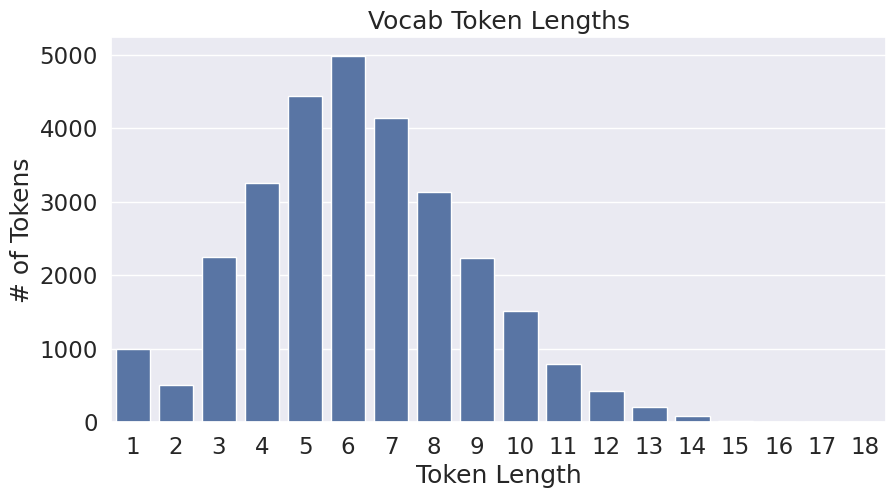

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(x=np.array(token_lengths))
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Number of subwords: 6477


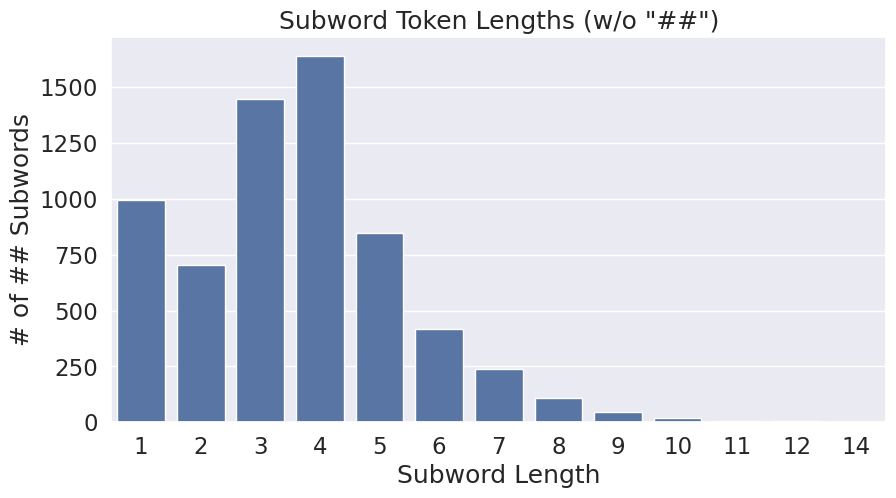

In [75]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)

sns.countplot(x=np.array(subword_lengths))
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')

print(f"Number of subwords: {len(subword_lengths)}")
